# Monitor meeting spike

This notebooks plots a 'typical' meeting spike observation of CO2 concetrations in the Large (B) meeting room.

A one hour meeting observered from 10:00 to 12:00.

* _Input:_ Exported .csv from Atal logged files.
* _Output:_ Saves a plot in .png format to disk

**Tasks:** 
* Loads the .csv files
* Removes irrelevant sensor data
* Plots the C02 concentrations in a timeframe

## Metadata

* **Master**: Master Information Studies: Information Systems (track)
* **University**: University of Amsterdam (UvA)
* **Institute**: Informatics Institute
* **Faculty**: Faculty of Science (FNWI)
* **Research Group**: Digital Interactions Lab (DIL)
* **Student**: BSc Danny de Vries (14495643)
* **Supervisor**: Dr. H. (Hamed) Seiied Alavi PhD

[Viszlab](https://www.viszlab.github.io) © 2024 by [Danny de Vries](https://wwww.github.com/dandevri) is licensed under [CC BY-NC-SA 4.0](http://creativecommons.org/licenses/by-nc-sa/4.0/?ref=chooser-v1).

## Prequisites

This notebooks needs a sufficient Python version (>=3.6) to run and requires some packages and libraries for analysis and visualization. The following code checks if your installed Python version is compatible, installs the necessary packages and imports the packages into the notebook.

### Check Python installation

In [11]:
from packaging import version
import platform
import sys

min_version = '3.8'

def check_version(min_version):
    current_version = sys.version.split()[0]
    return version.parse(current_version) >= version.parse(min_version)

# Example usage:
if __name__ == "__main__":
    if check_version(min_version):
        print("Running a sufficiently new version of Python.")
        print("Current version: " + platform.python_version())
        print("Minimum required version: " + min_version)
    else:
        print("Python version is too old. Upgrade to a newer version.")

Running a sufficiently new version of Python.
Current version: 3.9.12
Minimum required version: 3.8


### Install the required packages

In [12]:
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install numpy

### Import the packages into the project

In [13]:
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Clean-up

### Load the full CSV

In [14]:
def import_csv(file):
    df = pd.read_csv(file)
    return df

file = 'monitor-data/room-b_monitor_meeting_spike_data.csv'

full_data = import_csv(file)

print(full_data);

         a Date       Time   Temperature °C    RH %   DewPoint °C   CO2 ppm
0    10/04/2024   12:45:45           19.750  30.762         2.070     429.0
1    10/04/2024   12:46:00           19.760  30.695         2.048     429.0
2    10/04/2024   12:46:15           19.770  30.658         2.040     433.0
3    10/04/2024   12:46:30           19.800  30.634         2.055     433.0
4    10/04/2024   12:46:45           19.790  30.511         1.990     433.0
..          ...        ...              ...     ...           ...       ...
533  10/04/2024   14:59:00           22.932  24.323         1.514     451.0
534  10/04/2024   14:59:15           22.902  24.304         1.478     451.0
535  10/04/2024   14:59:30           22.862  24.304         1.445     451.0
536  10/04/2024   14:59:45           22.852  24.384         1.481     451.0
537  10/04/2024   15:00:00           22.832  24.341         1.440     451.0

[538 rows x 6 columns]


### Remove irrelevant rows

Remove rows the other sensory data irrelevant for this analysis.

In [16]:
def filter_columns(data):
    data.columns = data.columns.str.strip()
    filtered_df = data[['a Date', 'Time', 'CO2 ppm']]
    return filtered_df

filtered_data = filter_columns(full_data)
print(filtered_data)

         a Date       Time  CO2 ppm
0    10/04/2024   12:45:45    429.0
1    10/04/2024   12:46:00    429.0
2    10/04/2024   12:46:15    433.0
3    10/04/2024   12:46:30    433.0
4    10/04/2024   12:46:45    433.0
..          ...        ...      ...
533  10/04/2024   14:59:00    451.0
534  10/04/2024   14:59:15    451.0
535  10/04/2024   14:59:30    451.0
536  10/04/2024   14:59:45    451.0
537  10/04/2024   15:00:00    451.0

[538 rows x 3 columns]


### Format to 1 minute intervals

In [21]:
def remove_seconds_and_split(df):
    # Convert 'Date' and 'Time' columns to datetime format and combine them into one column
    df['DateTime'] = pd.to_datetime(df['a Date'].astype(str) + ' ' + df['Time'].apply(lambda x: x.strftime('%H:%M:%S')))

    # Remove seconds from DateTime column
    df['DateTime'] = df['DateTime'].dt.floor('min')

    # Split DateTime column into separate 'Date' and 'Time' columns
    df['a Date'] = df['DateTime'].dt.date
    df['Time'] = df['DateTime'].dt.time

    # Group by Date and Time and calculate the average CO2 value for each minute
    df = df.groupby(['a Date', 'Time']).agg({'CO2 ppm': 'mean'}).reset_index()

    return df

# Call the function to remove seconds and split into separate columns
df_minute = remove_seconds_and_split(filtered_data)

# Display the resulting DataFrame
print(df_minute)


         a Date      Time  CO2 ppm
0    2024-10-04  12:45:00   429.00
1    2024-10-04  12:46:00   432.00
2    2024-10-04  12:47:00   433.00
3    2024-10-04  12:48:00   435.25
4    2024-10-04  12:49:00   436.00
..          ...       ...      ...
131  2024-10-04  14:56:00   480.25
132  2024-10-04  14:57:00   480.00
133  2024-10-04  14:58:00   458.25
134  2024-10-04  14:59:00   451.00
135  2024-10-04  15:00:00   451.00

[136 rows x 3 columns]


/var/folders/g8/85cbmx4x789d0579p3qt0xsm0000gn/T/ipykernel_63337/4069385184.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DateTime'] = pd.to_datetime(df['a Date'].astype(str) + ' ' + df['Time'].apply(lambda x: x.strftime('%H:%M:%S')))
/var/folders/g8/85cbmx4x789d0579p3qt0xsm0000gn/T/ipykernel_63337/4069385184.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DateTime'] = df['DateTime'].dt.floor('min')
/var/folders/g8/85cbmx4x789d0579p3qt0xsm0000gn/T/ipykernel_63337/4069385184.py:9: SettingWi

### Plot the CO2 distribution

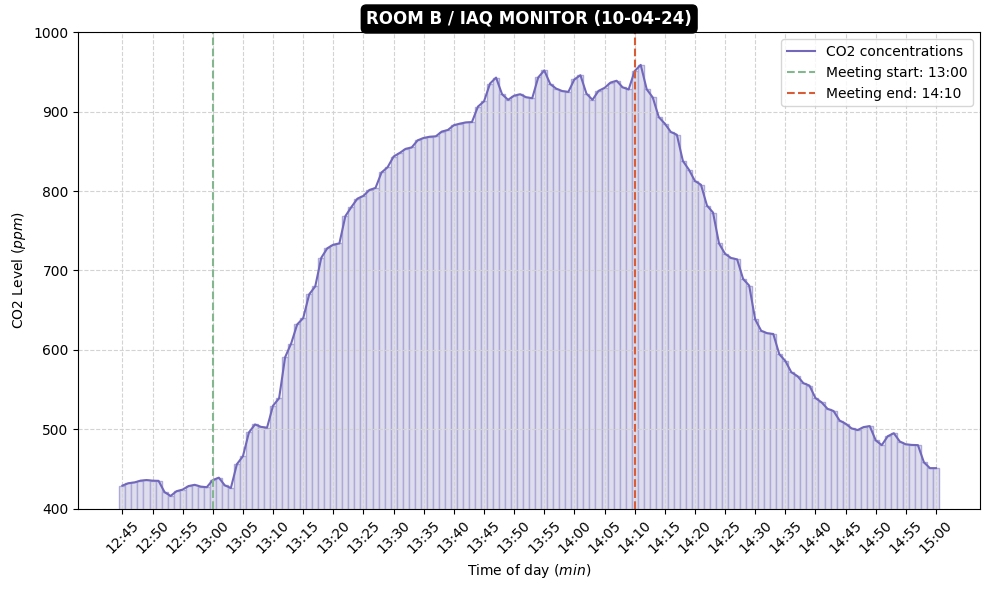

In [38]:
# Convert 'Time' column to strings
filtered_data['Time'] = filtered_data['Time'].astype(str)

# Reverse the order of the DataFrame
filtered_data = filtered_data.iloc[::-1]

# Plot CO2 ppm levels over time
plt.figure(figsize=(10, 6))
plt.plot(filtered_data.index, filtered_data['CO2 ppm'], linestyle='-', color='#7168bc', label='CO2 concentrations')

# Plot bars for CO2 ppm levels
plt.bar(filtered_data.index, filtered_data['CO2 ppm'], color='#deddee', width=1, edgecolor='#ada9d6')

title = plt.title('Room B / IAQ Monitor (10-04-24)'.upper(), fontweight="bold" )
title.set_position([.5, 0.6])  # Adjust the title position
title.set_color('white')  # Set title text color to white
title.set_bbox(dict(facecolor='black', edgecolor='black', boxstyle='round,pad=0.3'))  # Set title background color to black
plt.xlabel('Time of day (${min}$)') 
plt.ylabel('CO2 Level (${ppm}$)')

# Set y-axis limit
plt.ylim(400, 1000)

# Set x-axis ticks at intervals of 5 minutes
tick_positions = range(0, len(filtered_data), 5)

# Format time strings to remove seconds
time_ticks = [time.split(":")[0] + ":" + time.split(":")[1] for time in filtered_data['Time'][tick_positions]]

plt.xticks(tick_positions, time_ticks, rotation=45)  # Update to use formatted time_ticks

# Add markers at the 5-minute intervals
plt.plot(filtered_data.index[tick_positions], filtered_data['CO2 ppm'].iloc[tick_positions], markersize=4, linestyle='')

# Add vertical lines for start and end of meeting
start_index = filtered_data[filtered_data['Time'] == '13:00:00'].index[0]
end_index = filtered_data[filtered_data['Time'] == '14:10:00'].index[0]
plt.axvline(x=start_index, color='#84b690', linestyle='--', label='Meeting start: 13:00')
plt.axvline(x=end_index, color='#d85c36', linestyle='--', label='Meeting end: 14:10')

plt.grid(True, linestyle='--', color='lightgrey')
plt.tight_layout()
plt.legend()

# Save the chart to disk
plt.savefig('monitor-charts/room-b-monitor-meeting-spike.png', dpi=300, bbox_inches='tight')

plt.show()
